#### Download data from Kaggle

In [3]:
from kaggle_utils.src import KaggleDataApi
from src import CURRENT_ROOT_DIR

In [4]:
kda = KaggleDataApi(call_path = CURRENT_ROOT_DIR)
kda.download_kaggle_dataset(dataset_name="facial_keypoints_detection")

File downloaded and saved to:   c:\users\sankr\documents\projects\git_work\experiments_cv_nlp\data\facial-keypoints-detection.zip


In [8]:
folder_location, _ = kda.unzip_and_return_folder_details()

In [11]:
CURRENT_ROOT_DIR

'c:\\users\\sankr\\documents\\projects\\git_work\\experiments_cv_nlp'

In [14]:
import zipfile

In [15]:
import os

data_location = os.path.join(CURRENT_ROOT_DIR, "data")
for file_name in ["test.zip", "training.zip"]:
    complete_path = os.path.join(folder_location, file_name)
    with zipfile.ZipFile(complete_path, 'r') as zip_ref:
        zip_ref.extractall(folder_location)

#### Data exploration

In [5]:
root_folder = "c:\\users\\sankr\\documents\\projects\\git_work\\experiments_cv_nlp\\data\\facial-keypoints-detection"
import os
import zipfile
import pandas as pd
import numpy as np

In [6]:
os.listdir(root_folder)

['IdLookupTable.csv',
 'SampleSubmission.csv',
 'test.csv',
 'test.zip',
 'training.csv',
 'training.zip']

In [7]:
annotation_file = os.path.join(root_folder, "IdLookupTable.csv")
submission_file = os.path.join(root_folder, "SampleSubmission.csv")
test_data = os.path.join(root_folder, "test.csv")
train_data = os.path.join(root_folder, "training.csv")

In [8]:
os.makedirs(os.path.join(root_folder, train_data.replace("csv", "")), exist_ok =True)
os.makedirs(os.path.join(root_folder, test_data.replace("csv", "")), exist_ok = True)

In [9]:
from PIL import Image

In [10]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv(train_data)

In [12]:
df["Image"] = df.Image.apply(lambda x: np.array(x.split(" "), dtype="float"))
df["Image"] = df.Image.apply(lambda pixel: pixel.reshape(96, 96, 1))
df["Image"] = df.Image.apply(lambda pixel: pixel/255)

In [13]:
images = df.pop("Image")

In [14]:
df.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [15]:
images[0]

array([[[0.93333333],
        [0.9254902 ],
        [0.92941176],
        ...,
        [0.98039216],
        [0.98039216],
        [0.98039216]],

       [[0.92156863],
        [0.93333333],
        [0.9254902 ],
        ...,
        [0.97647059],
        [0.98039216],
        [0.98431373]],

       [[0.92941176],
        [0.9254902 ],
        [0.92941176],
        ...,
        [0.98431373],
        [0.98431373],
        [0.98039216]],

       ...,

       [[0.72941176],
        [0.71764706],
        [0.70980392],
        ...,
        [0.20392157],
        [0.22352941],
        [0.23529412]],

       [[0.74117647],
        [0.7372549 ],
        [0.81176471],
        ...,
        [0.23921569],
        [0.27058824],
        [0.30588235]],

       [[0.74901961],
        [0.72156863],
        [0.72156863],
        ...,
        [0.2745098 ],
        [0.29411765],
        [0.35294118]]])

In [16]:
isinstance(images[0], np.ndarray)

True

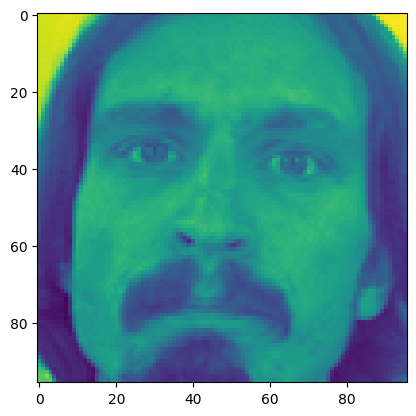

In [17]:
from matplotlib import pyplot as plt

plt.imshow(images[0])

In [18]:
images[0]

array([[[0.93333333],
        [0.9254902 ],
        [0.92941176],
        ...,
        [0.98039216],
        [0.98039216],
        [0.98039216]],

       [[0.92156863],
        [0.93333333],
        [0.9254902 ],
        ...,
        [0.97647059],
        [0.98039216],
        [0.98431373]],

       [[0.92941176],
        [0.9254902 ],
        [0.92941176],
        ...,
        [0.98431373],
        [0.98431373],
        [0.98039216]],

       ...,

       [[0.72941176],
        [0.71764706],
        [0.70980392],
        ...,
        [0.20392157],
        [0.22352941],
        [0.23529412]],

       [[0.74117647],
        [0.7372549 ],
        [0.81176471],
        ...,
        [0.23921569],
        [0.27058824],
        [0.30588235]],

       [[0.74901961],
        [0.72156863],
        [0.72156863],
        ...,
        [0.2745098 ],
        [0.29411765],
        [0.35294118]]])

#### Modelling

In [1]:
from src.cv.pytorch.datasets.facial_keypoint_detection.dataset import FacialKeypointDataset
# from src.cv.pytorch.models.configs import ModelTrainingConfig, ModelDataConfig
# from src.cv.pytorch.models.use_cases.facial_keypoint_detection.utils import show_key_points_on_images
# from src import CURRENT_ROOT_DIR

In [2]:
fkd = FacialKeypointDataset(
    dataset_name="faces", 
    data_type = "csv",
    data_file=r"data/facial-keypoints-detection/training.csv",
    resize_size=96
)


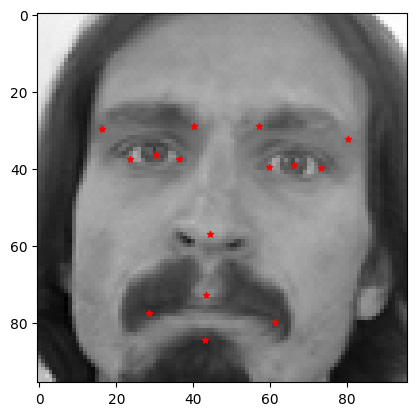

In [3]:
show_key_points_on_images(dataset=fkd, idx=0)

In [3]:
list_of_view = [fkd[i] for i in range(50, 60)]

In [3]:
from src.cv.pytorch.models.use_cases.facial_keypoint_detection.utils import multi_view_image_keypoints


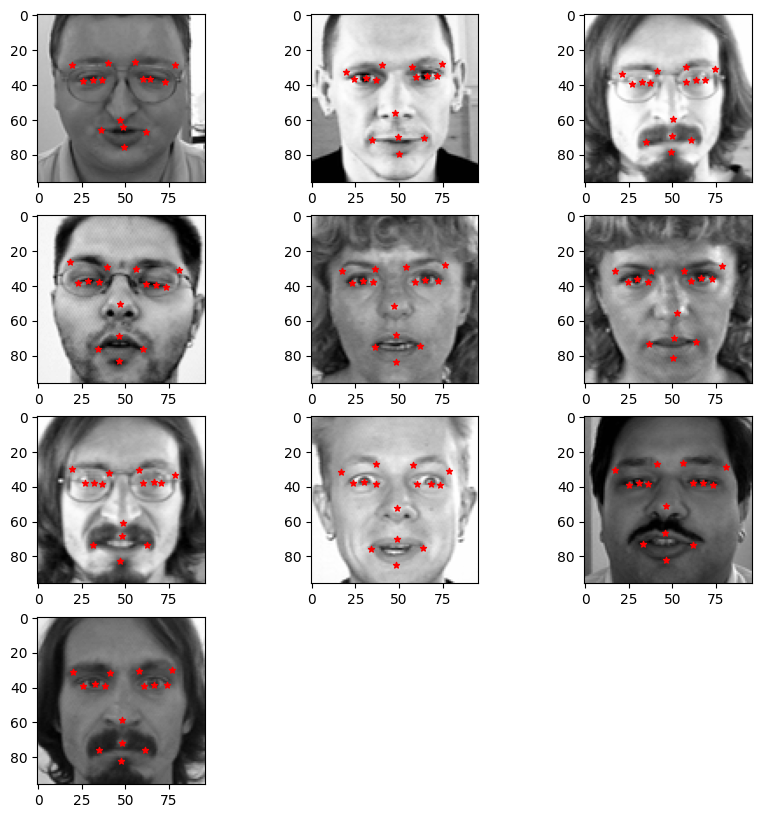

In [5]:
multi_view_image_keypoints(list_of_view)

#### Training the model

In [3]:
model_training_config = dict(learning_rate=0.01, batch_size=256, epochs=50)
model_data_config=dict(train_data_pct=0.8, dataset_size=len(fkd))

In [4]:
from src.cv.model_pipelines.facial_keypoint_cnn_pipeline import FacialCNNTrainingPipeline

In [5]:
model_initialization_params=dict(
    cnn_layers = 3,
    input_channel = 1,
    output_channels = [32, 160, 96, 128, 30],
    kernel_sizes = [(5,5), (3,3), (3,3)],
    linear_layers = 2,
    dropout_addition_options=6, 
    dropout_threshold=[0.1, 0.2],
)

# fk_vcnn = FacialKeypointVCNN(
#     cnn_layers, input_channels, output_channels, kernel_sizes, 
#     linear_layers, 
# ).to(ModelTrainingConfig.device)

# print(fk_vcnn)

In [6]:
facial_keypoint_pipeline = FacialCNNTrainingPipeline(
    dataset=fkd,
    model_data_config=model_data_config,
    model_initialization_params=model_initialization_params,
    model_training_config = model_training_config
)

In [7]:
print(facial_keypoint_pipeline.model)

FacialKeypointVCNN(
  (conv2d1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (max_pool2d1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2d2): Conv2d(32, 160, kernel_size=(3, 3), stride=(1, 1))
  (max_pool2d2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2d3): Conv2d(160, 96, kernel_size=(3, 3), stride=(1, 1))
  (max_pool2d3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.1, inplace=False)
  (linear1): LazyLinear(in_features=0, out_features=128, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (linear2): Linear(in_features=128, out_features=30, bias=True)
)


In [ ]:
facial_keypoint_pipeline.train()

  0%|                                                                                                               | 0/50 [00:00<?, ?it/s]

Train Loss for epoch 0: 919.0081


  2%|██                                                                                                   | 1/50 [01:14<1:00:39, 74.27s/it]

Validation Loss for epoch 0: 179.6295
Train Loss for epoch 1: 169.5851


  4%|████                                                                                                   | 2/50 [02:18<54:54, 68.64s/it]

Validation Loss for epoch 1: 435.0883
Train Loss for epoch 2: 206.2778


  6%|██████▏                                                                                                | 3/50 [03:20<51:04, 65.21s/it]

Validation Loss for epoch 2: 86.6884
Train Loss for epoch 3: 84.0179


  8%|████████▏                                                                                              | 4/50 [04:22<49:06, 64.05s/it]

Validation Loss for epoch 3: 57.5435
Train Loss for epoch 4: 68.9444


 10%|██████████▎                                                                                            | 5/50 [05:27<48:13, 64.30s/it]

Validation Loss for epoch 4: 159.3082
Train Loss for epoch 5: 108.9117


 12%|████████████▎                                                                                          | 6/50 [06:30<47:01, 64.11s/it]

Validation Loss for epoch 5: 78.0394
Train Loss for epoch 6: 55.9797


 14%|██████████████▍                                                                                        | 7/50 [07:36<46:11, 64.46s/it]

Validation Loss for epoch 6: 63.1896
Train Loss for epoch 7: 60.7613


 16%|████████████████▍                                                                                      | 8/50 [08:41<45:19, 64.76s/it]

Validation Loss for epoch 7: 30.2410
Train Loss for epoch 8: 48.9020


 18%|██████████████████▌                                                                                    | 9/50 [09:54<46:01, 67.35s/it]

Validation Loss for epoch 8: 45.2784
Train Loss for epoch 9: 48.3333


 20%|████████████████████▍                                                                                 | 10/50 [10:57<44:04, 66.10s/it]

Validation Loss for epoch 9: 93.2904
Train Loss for epoch 10: 69.3765


 22%|██████████████████████▍                                                                               | 11/50 [12:04<43:10, 66.42s/it]

Validation Loss for epoch 10: 83.1176
Train Loss for epoch 11: 66.6291


 24%|████████████████████████▍                                                                             | 12/50 [13:11<42:03, 66.41s/it]

Validation Loss for epoch 11: 69.3125
Train Loss for epoch 12: 45.0292


 26%|██████████████████████████▌                                                                           | 13/50 [14:20<41:24, 67.14s/it]

Validation Loss for epoch 12: 39.1830
Train Loss for epoch 13: 42.2800


 28%|████████████████████████████▌                                                                         | 14/50 [15:23<39:37, 66.05s/it]

Validation Loss for epoch 13: 57.1071
Train Loss for epoch 14: 52.0488


 30%|██████████████████████████████▌                                                                       | 15/50 [16:24<37:38, 64.54s/it]

Validation Loss for epoch 14: 259.9334
Train Loss for epoch 15: 101.8436


 32%|████████████████████████████████▋                                                                     | 16/50 [17:28<36:22, 64.20s/it]

Validation Loss for epoch 15: 138.6345
Train Loss for epoch 16: 62.9539


 34%|██████████████████████████████████▋                                                                   | 17/50 [18:37<36:13, 65.86s/it]

Validation Loss for epoch 16: 44.1720
Train Loss for epoch 17: 49.4967


 36%|████████████████████████████████████▋                                                                 | 18/50 [19:37<34:03, 63.87s/it]

Validation Loss for epoch 17: 58.0910
Train Loss for epoch 18: 48.0672


 38%|██████████████████████████████████████▊                                                               | 19/50 [20:39<32:46, 63.43s/it]

Validation Loss for epoch 18: 23.7359
Train Loss for epoch 19: 50.2062


 40%|████████████████████████████████████████▊                                                             | 20/50 [21:40<31:23, 62.80s/it]

Validation Loss for epoch 19: 67.1601
Train Loss for epoch 20: 46.4151


 42%|██████████████████████████████████████████▊                                                           | 21/50 [22:41<30:03, 62.19s/it]

Validation Loss for epoch 20: 74.3869
Train Loss for epoch 21: 42.5905


 44%|████████████████████████████████████████████▉                                                         | 22/50 [23:44<29:06, 62.36s/it]

Validation Loss for epoch 21: 28.6417
Train Loss for epoch 22: 43.4942


 46%|██████████████████████████████████████████████▉                                                       | 23/50 [24:48<28:15, 62.80s/it]

Validation Loss for epoch 22: 31.7916
Train Loss for epoch 23: 39.1715


 48%|████████████████████████████████████████████████▉                                                     | 24/50 [25:51<27:17, 62.97s/it]

Validation Loss for epoch 23: 32.7175
Train Loss for epoch 24: 40.6934


 50%|███████████████████████████████████████████████████                                                   | 25/50 [26:53<26:03, 62.54s/it]

Validation Loss for epoch 24: 44.1670
Train Loss for epoch 25: 40.9947


 52%|█████████████████████████████████████████████████████                                                 | 26/50 [27:59<25:27, 63.65s/it]

Validation Loss for epoch 25: 23.8881
Train Loss for epoch 26: 39.0090


 54%|███████████████████████████████████████████████████████                                               | 27/50 [29:03<24:28, 63.83s/it]

Validation Loss for epoch 26: 52.9827
Train Loss for epoch 27: 42.8212


 56%|█████████████████████████████████████████████████████████                                             | 28/50 [30:04<23:07, 63.07s/it]

Validation Loss for epoch 27: 140.8773
Train Loss for epoch 28: 49.5938


 58%|███████████████████████████████████████████████████████████▏                                          | 29/50 [31:06<21:53, 62.56s/it]

Validation Loss for epoch 28: 111.7071
Train Loss for epoch 29: 54.9543


 60%|█████████████████████████████████████████████████████████████▏                                        | 30/50 [32:07<20:42, 62.15s/it]

Validation Loss for epoch 29: 71.1340
Train Loss for epoch 30: 43.3960


 62%|███████████████████████████████████████████████████████████████▏                                      | 31/50 [33:08<19:35, 61.85s/it]

Validation Loss for epoch 30: 175.2143
Train Loss for epoch 31: 70.9630


 64%|█████████████████████████████████████████████████████████████████▎                                    | 32/50 [34:12<18:43, 62.40s/it]

Validation Loss for epoch 31: 206.5494
Train Loss for epoch 32: 90.5057


 66%|███████████████████████████████████████████████████████████████████▎                                  | 33/50 [35:16<17:48, 62.83s/it]

Validation Loss for epoch 32: 192.9763
Train Loss for epoch 33: 57.3224


 68%|█████████████████████████████████████████████████████████████████████▎                                | 34/50 [36:25<17:17, 64.82s/it]

Validation Loss for epoch 33: 96.2584
Train Loss for epoch 34: 56.2168


 70%|███████████████████████████████████████████████████████████████████████▍                              | 35/50 [37:29<16:09, 64.61s/it]

Validation Loss for epoch 34: 40.4813
Train Loss for epoch 35: 44.2212


 72%|█████████████████████████████████████████████████████████████████████████▍                            | 36/50 [38:35<15:07, 64.85s/it]

Validation Loss for epoch 35: 21.2187
Train Loss for epoch 36: 46.5573


 74%|███████████████████████████████████████████████████████████████████████████▍                          | 37/50 [39:38<13:58, 64.52s/it]

Validation Loss for epoch 36: 37.8827
Train Loss for epoch 37: 39.7289


 76%|█████████████████████████████████████████████████████████████████████████████▌                        | 38/50 [40:46<13:05, 65.50s/it]

Validation Loss for epoch 37: 316.6960
Train Loss for epoch 38: 80.7107


 78%|███████████████████████████████████████████████████████████████████████████████▌                      | 39/50 [41:50<11:54, 64.95s/it]

Validation Loss for epoch 38: 394.4189
Train Loss for epoch 39: 124.1355


 80%|█████████████████████████████████████████████████████████████████████████████████▌                    | 40/50 [42:52<10:42, 64.21s/it]

Validation Loss for epoch 39: 165.4339
Train Loss for epoch 40: 62.5197


 82%|███████████████████████████████████████████████████████████████████████████████████▋                  | 41/50 [43:55<09:32, 63.66s/it]

Validation Loss for epoch 40: 43.0270
Train Loss for epoch 41: 52.7701


 84%|█████████████████████████████████████████████████████████████████████████████████████▋                | 42/50 [44:57<08:26, 63.28s/it]

Validation Loss for epoch 41: 45.3409
Train Loss for epoch 42: 40.3180


 86%|███████████████████████████████████████████████████████████████████████████████████████▋              | 43/50 [46:04<07:31, 64.50s/it]

Validation Loss for epoch 42: 138.8993


1. In the above, we often see training error higher than test error. Reason -> The training loss includes dropout which inflates it.
2. Without use of BatchNormalization, error is higher.
3. Owing to the complexity of the network -> despite dropout it overfits. Change pooling to avgerage max pooling, reduce complexity
4. Spikes in training are seen due to mini batch gradient descent. Some batch might have "not good" data for optimization "by chance" due to random sampler.. thus the spikes. Overfitting doesn't help.